# Uber_Analysis

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [45]:
df = pd.read_csv('Uber Request Data.csv')

In [46]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [47]:
df.shape

(6745, 6)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [49]:
df.isnull().sum()

Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

In [50]:
df['Request timestamp']=pd.to_datetime(df['Request timestamp'])
df['Drop timestamp']=pd.to_datetime(df['Drop timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null datetime64[ns]
Drop timestamp       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB


In [51]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [52]:
df['Request Time']=df['Request timestamp'].dt.time
df['Drop Time']=df['Drop timestamp'].dt.time
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47


In [53]:
df['Trip Time'] = df['Drop timestamp'] - df['Request timestamp'] 
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Time,Trip Time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,13:00:00,01:09:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,18:47:00,00:50:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,09:58:00,00:41:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,22:03:00,00:55:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,00:52:31


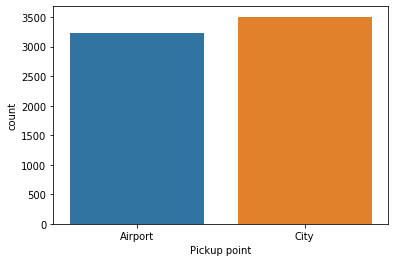

In [62]:
sns.countplot(df['Pickup point'])
plt.show()

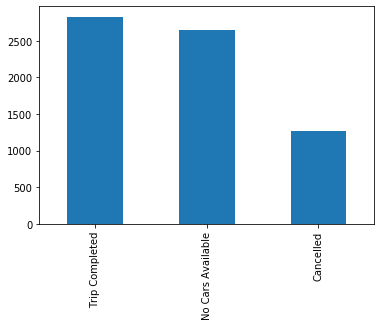

In [61]:
pd.value_counts(df['Status']).plot.bar()
plt.show()

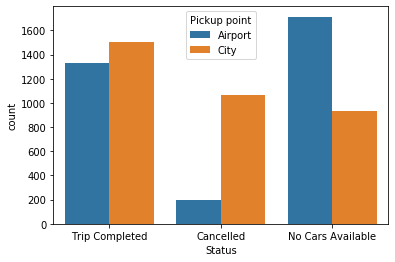

In [60]:
sns.countplot(x="Status", hue="Pickup point", data=df)
plt.show()

In [63]:
df['req_day']=df['Request timestamp'].dt.day
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Time,Trip Time,req_day
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,13:00:00,01:09:00,7
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,18:47:00,00:50:00,7
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,09:58:00,00:41:00,7
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,22:03:00,00:55:00,7
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,00:52:31,13


In [64]:
df['req_month']=df['Request timestamp'].dt.month
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Time,Trip Time,req_day,req_month
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,13:00:00,01:09:00,7,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,18:47:00,00:50:00,7,11
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,09:58:00,00:41:00,7,12
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,22:03:00,00:55:00,7,12
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,00:52:31,13,7


In [68]:
df['req_hour']=df['Request timestamp'].dt.hour
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Time,Trip Time,req_day,req_month,req_hour
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,13:00:00,01:09:00,7,11,11
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,18:47:00,00:50:00,7,11,17
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,09:58:00,00:41:00,7,12,9
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,22:03:00,00:55:00,7,12,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,00:52:31,13,7,8


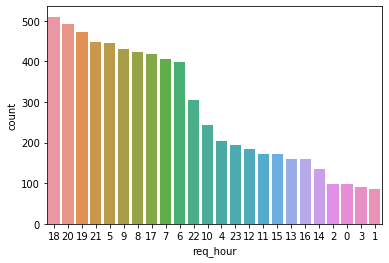

In [71]:
sns.countplot(df['req_hour'],order = df['req_hour'].value_counts().index)

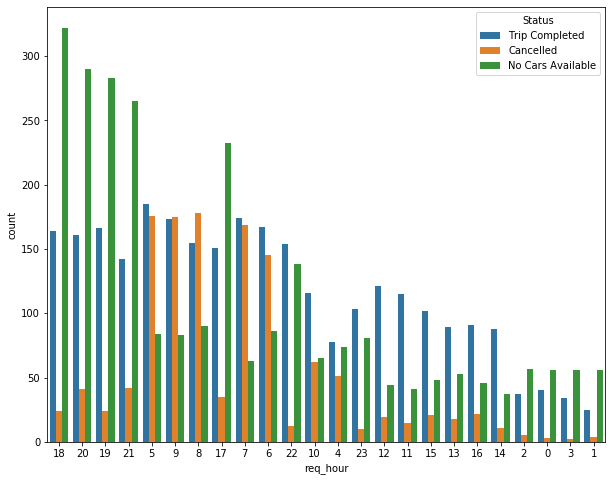

In [74]:
plt.figure(figsize=(10,8))
sns.countplot(df['req_hour'],order = df['req_hour'].value_counts().index,hue=df['Status'])

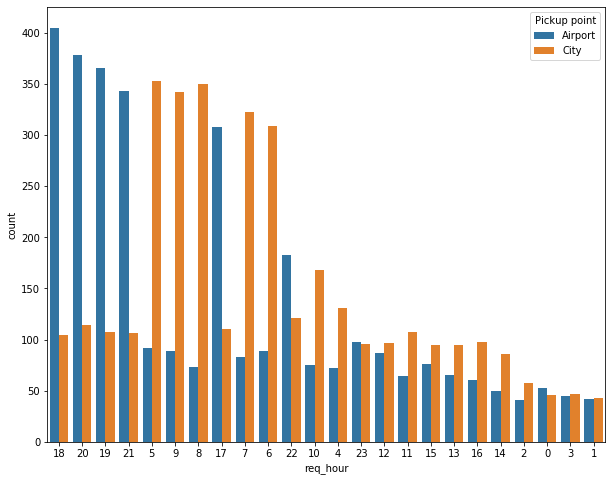

In [79]:
plt.figure(figsize=(10,8))
sns.countplot(df['req_hour'],order = df['req_hour'].value_counts().index,hue=df['Pickup point'])

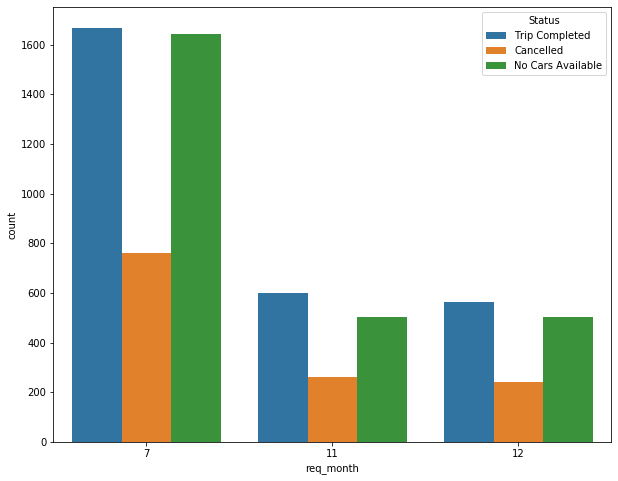

In [80]:
plt.figure(figsize=(10,8))
sns.countplot(df['req_month'],order = df['req_month'].value_counts().index,hue=df['Status'])

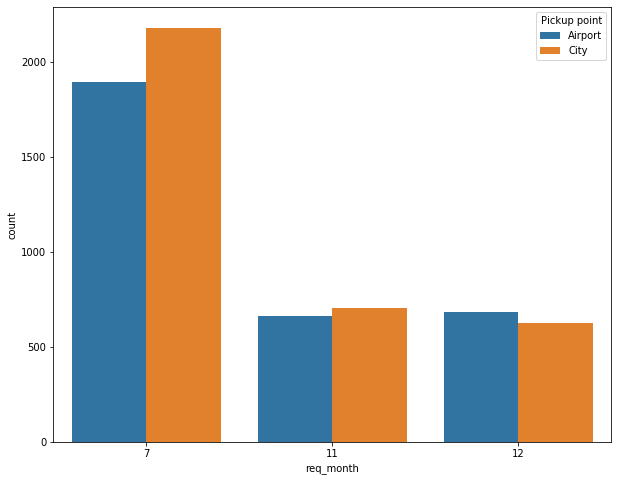

In [81]:
plt.figure(figsize=(10,8))
sns.countplot(df['req_month'],order = df['req_month'].value_counts().index,hue=df['Pickup point'])

In [83]:
df['req_day'].value_counts()

7     2674
15    1381
14    1353
13    1337
Name: req_day, dtype: int64

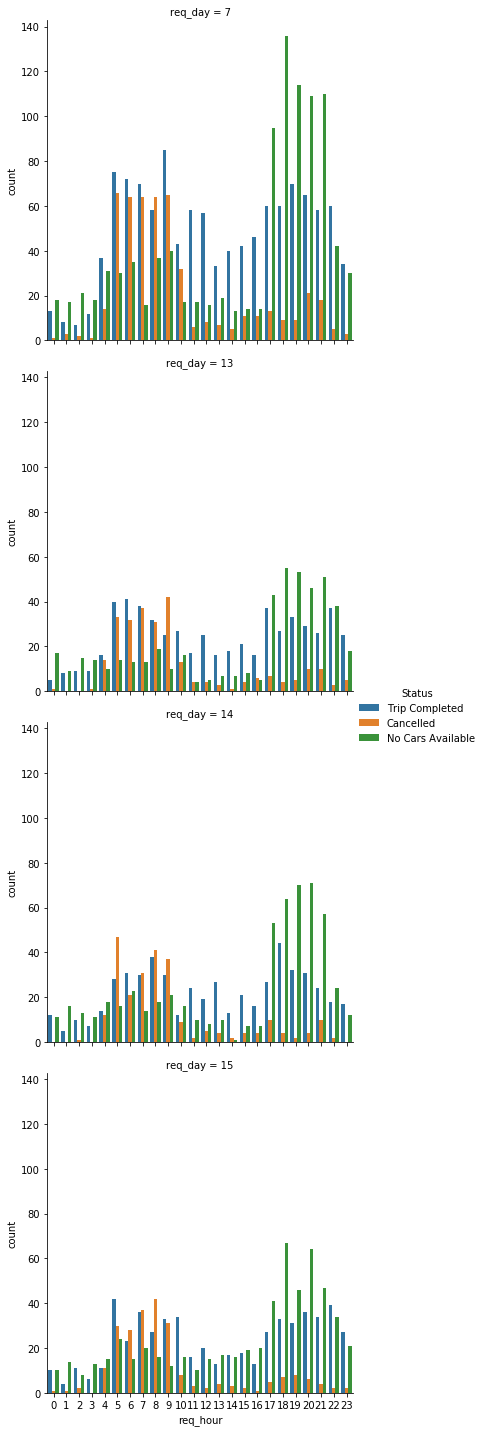

In [86]:
# factor plot of hour and day w.r.t. status
sns.factorplot(x = "req_hour", hue = "Status", row = "req_day", data = df, kind = "count")

In [91]:
def timeslot(x):
    if x<5:
        return('Early Morning')
    elif  5<= x<10:
        return ('Morning')
    elif 10<= x<17:
        return ('Daytime')
    elif 17 <= x<22:
        return ('Evening')
    else:
        return ('Late Night')
df['Time slot']=df['req_hour'].apply(lambda x: timeslot(x))
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Time,Trip Time,req_day,req_month,req_hour,Time slot
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11:51:00,13:00:00,01:09:00,7,11,11,Daytime
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,18:47:00,00:50:00,7,11,17,Evening
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,09:17:00,09:58:00,00:41:00,7,12,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,22:03:00,00:55:00,7,12,21,Evening
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,08:33:16,09:25:47,00:52:31,13,7,8,Morning


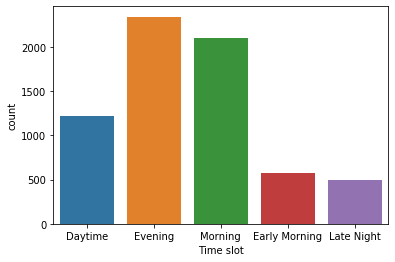

In [92]:
sns.countplot(df['Time slot'])

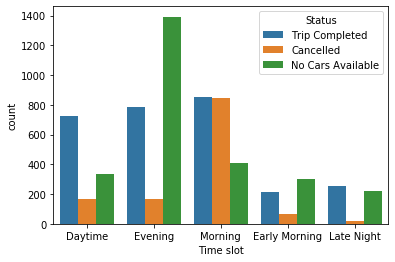

In [93]:
sns.countplot(df['Time slot'],hue=df['Status'])

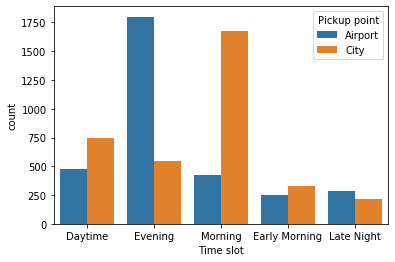

In [94]:
sns.countplot(df['Time slot'],hue=df['Pickup point'])

In [95]:
df['Time slot'].value_counts()

Evening          2342
Morning          2103
Daytime          1224
Early Morning     578
Late Night        498
Name: Time slot, dtype: int64

In [107]:
df_eveng=df.loc[df['Time slot']=='Evening']
df_eveng.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Time,Drop Time,Trip Time,req_day,req_month,req_hour,Time slot
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17:57:00,18:47:00,00:50:00,7,11,17,Evening
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21:08:00,22:03:00,00:55:00,7,12,21,Evening
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,21:57:28,22:28:59,00:31:31,13,7,21,Evening
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,17:57:27,18:50:51,00:53:24,15,7,17,Evening
15,3482,Airport,2.0,Trip Completed,2016-07-13 17:23:18,2016-07-13 18:20:51,17:23:18,18:20:51,00:57:33,13,7,17,Evening


In [108]:
df_eveng.shape

(2342, 13)

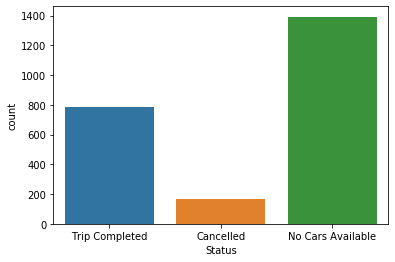

In [109]:
sns.countplot(df_eveng['Status'])

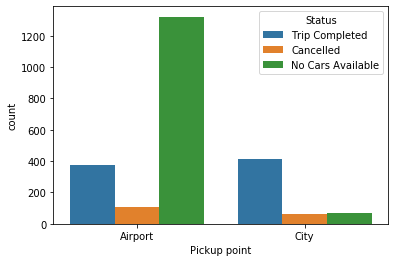

In [110]:
sns.countplot(df_eveng['Pickup point'],hue=df_eveng['Status'])

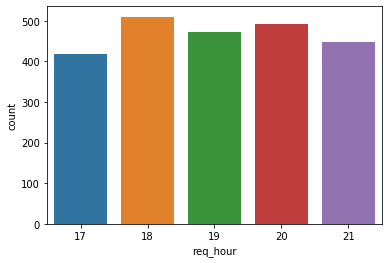

In [111]:
sns.countplot(df_eveng['req_hour'])